# Netflix Shows and Movies

### Dataset

Dataset ini berisi informasi tentang film dan acara TV yang tersedia di Netflix hingga November 2019. Data ini mencakup berbagai metadata seperti judul, jenis konten (film atau acara TV), sutradara, pemeran, negara asal, tanggal rilis, genre, durasi, rating, dan deskripsi singkat dari setiap judul.

Fitur dalam Dataset
- show_id: ID unik untuk setiap film atau acara TV.
- type: Jenis konten, apakah itu Movie (film) atau TV Show (acara TV).
- title: Nama dari film atau acara TV.
- director: Nama sutradara dari film atau acara TV (jika tersedia).
- cast: Daftar aktor utama yang membintangi film atau acara TV.
- country: Negara asal tempat film atau acara TV diproduksi.
- date_added: Tanggal ketika film atau acara TV ditambahkan ke Netflix.
-release_year: Tahun rilis dari film atau acara TV.
- rating: Klasifikasi usia, seperti TV-MA, PG-13, R, dll.
- duration: Lama durasi film (dalam menit) atau jumlah musim untuk acara TV.
- listed_in: Kategori atau genre dari film atau acara TV.
- description: Ringkasan singkat tentang isi film atau acara TV.

### Read Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

In [2]:
sns.set(style="whitegrid")

df = pd.read_csv("netflix_titles_nov_2019.csv")
df.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show


In [3]:
# Filter data hanya dari tahun 2000 hingga 2019
df = df[(df['release_year'] >= 2000) & (df['release_year'] <= 2019)]

### EDA

In [4]:
print("Jumlah baris dan kolom:", df.shape)
print("\nTipe data:\n", df.dtypes)

Jumlah baris dan kolom: (5533, 12)

Tipe data:
 show_id          int64
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
type            object
dtype: object


In [5]:
df.nunique()

show_id         5533
title           5481
director        2951
cast            4808
country          515
date_added      1082
release_year      20
rating            14
duration         188
listed_in        413
description     5525
type               2
dtype: int64

### Data Visualization

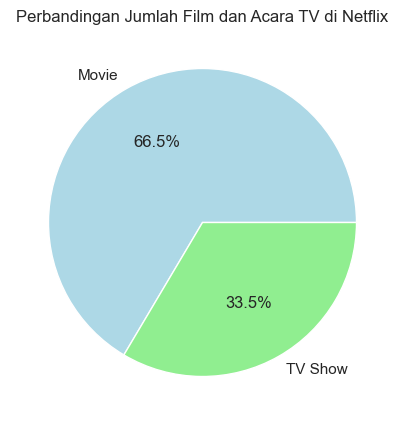

In [6]:
# Perbandingan Jumlah Film vs Acara TV
plt.figure(figsize=(7,5))
df['type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
plt.title("Perbandingan Jumlah Film dan Acara TV di Netflix")
plt.ylabel("")
plt.show()

Insight: Netflix memiliki lebih banyak film dibandingkan TV show. Hal ini menunjukkan bahwa Netflix masih lebih fokus pada film, meskipun mereka juga mengembangkan konten serial.

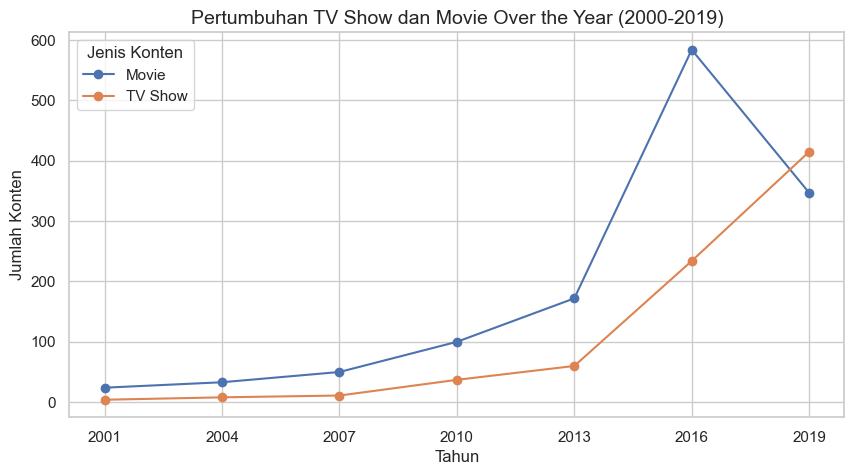

In [7]:
# Line Chart Pertumbuhan TV Show dan Movie Over the Year
df_yearly = df.groupby(['release_year', 'type']).size().unstack().fillna(0)
df_yearly = df_yearly.loc[df_yearly.index % 3 == 0]  # Filter hanya setiap 3 tahun

plt.figure(figsize=(10,5))
df_yearly.plot(kind='line', marker='o', ax=plt.gca())
plt.title("Pertumbuhan TV Show dan Movie Over the Year (2000-2019)", fontsize=14)
plt.xlabel("Tahun")
plt.ylabel("Jumlah Konten")
plt.xticks(df_yearly.index)
plt.legend(title="Jenis Konten")
plt.show()

Insight: jumlah film dan acara TV di Netflix mengalami peningkatan signifikan sejak tahun 2010. Puncak penambahan konten terjadi antara 2016-2019. Pada thun 2019 jumlah TV Show lebih banyak dibandingkan dengan jumlah film.

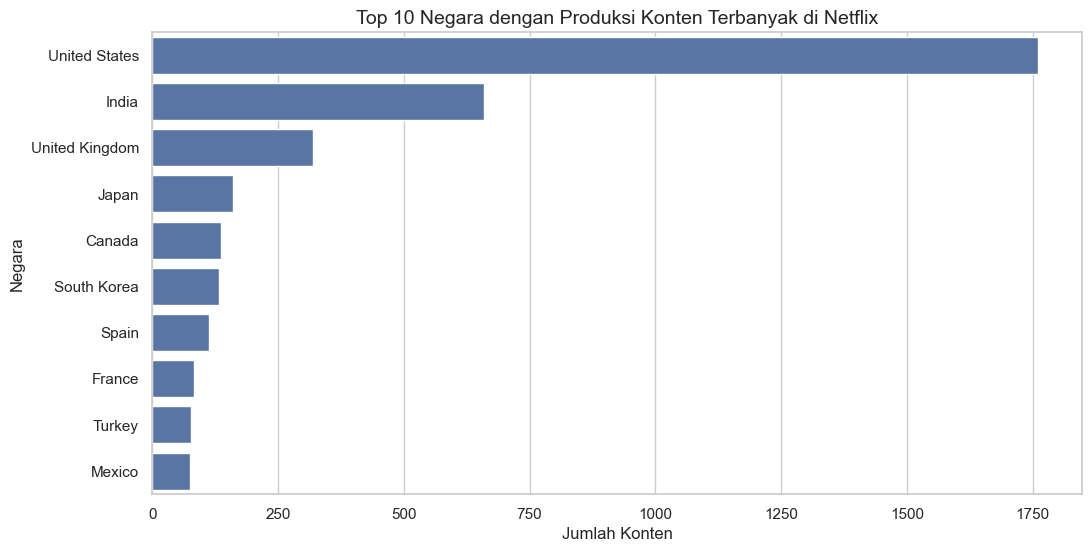

In [8]:
# Top 10 Negara dengan Produksi Konten Terbanyak
top_countries = df['country'].value_counts().nlargest(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Negara dengan Produksi Konten Terbanyak di Netflix", fontsize=14)
plt.xlabel("Jumlah Konten")
plt.ylabel("Negara")
plt.show()

Insight: Amerika Serikat adalah produsen konten terbesar di Netflix, diikuti oleh India, Inggris, dan Jepang. Negara-negara seperti Korea Selatan dan Kanada juga memiliki banyak konten, kemungkinan karena daya tarik drama Korea dan produksi film Kanada.

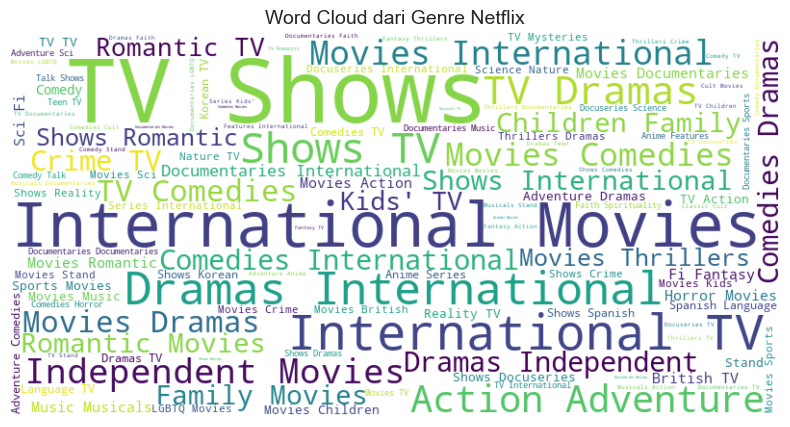

In [9]:
# Word Cloud Genre Netflix
genre_text = " ".join(df['listed_in'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(genre_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud dari Genre Netflix", fontsize=14)
plt.show()

Insight: Genre yang paling banyak muncul di Netflix meliputi Drama, Comedy, Action, dan International Movies.
Banyaknya genre "International" menunjukkan bahwa Netflix memiliki katalog konten global yang luas.

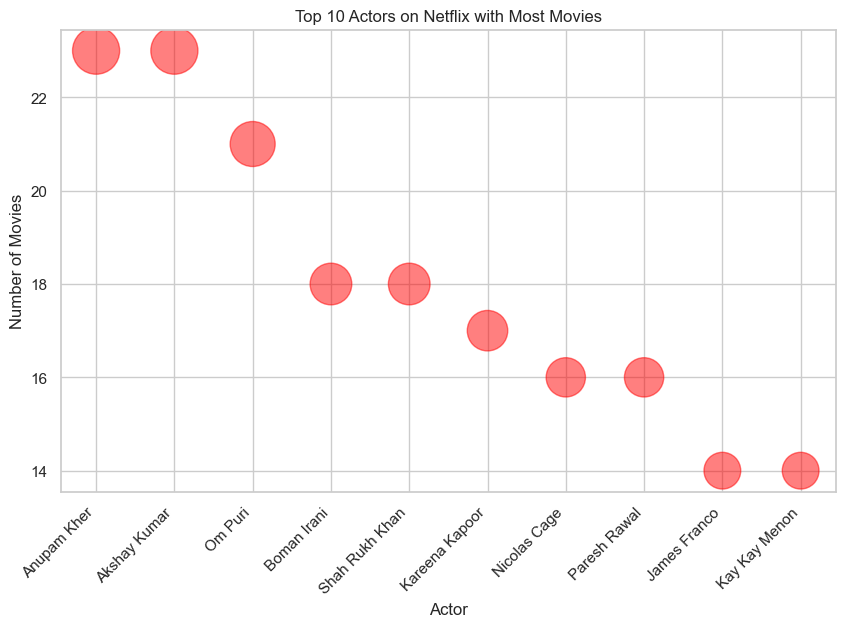

In [10]:
# Top Actors with Most Movies
df_movies = df[df['type'] == 'Movie']
actor_counts = Counter(', '.join(df_movies['cast'].dropna()).split(', '))
actors_df = pd.DataFrame(actor_counts.items(), columns=['Actor', 'Count']).sort_values(by='Count', ascending=False)

plt.figure(figsize=(10, 6))
plt.scatter(actors_df['Actor'].head(10), actors_df['Count'].head(10), s=actors_df['Count'].head(10) * 50, alpha=0.5, color='red')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Actor")
plt.ylabel("Number of Movies")
plt.title("Top 10 Actors on Netflix with Most Movies")
plt.show()


Insight: Ada beberapa aktor yang memiliki banyak film di Netflix, seperti Anupam Kher, Akshay Kumar, Om Puri, kemungkinan karena kesepakatan lisensi atau popularitas mereka dalam berbagai genre.

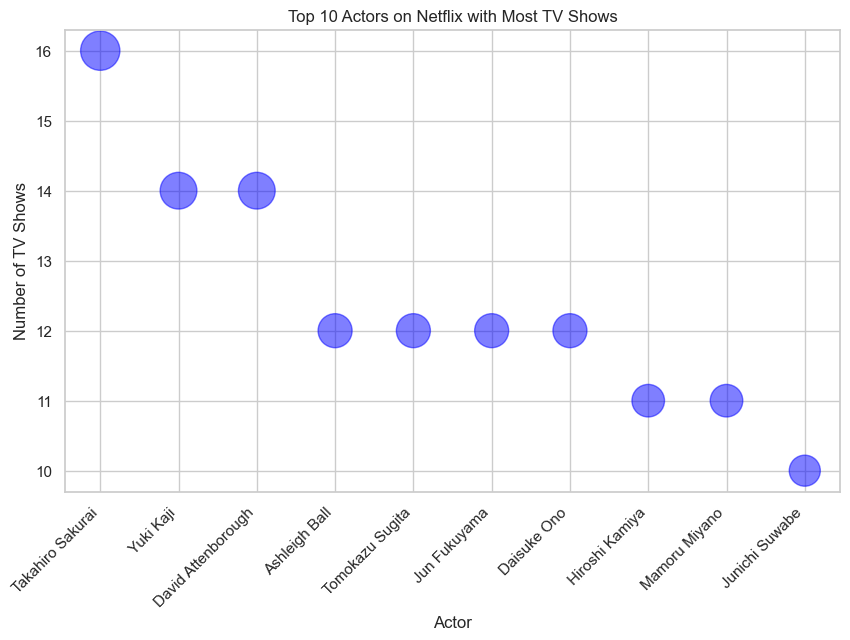

In [11]:

# Top Actors with Most TV Shows
df_tvshows = df[df['type'] == 'TV Show']
actor_counts_tv = Counter(', '.join(df_tvshows['cast'].dropna()).split(', '))
actors_tv_df = pd.DataFrame(actor_counts_tv.items(), columns=['Actor', 'Count']).sort_values(by='Count', ascending=False)

plt.figure(figsize=(10, 6))
plt.scatter(actors_tv_df['Actor'].head(10), actors_tv_df['Count'].head(10), s=actors_tv_df['Count'].head(10) * 50, alpha=0.5, color='blue')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Actor")
plt.ylabel("Number of TV Shows")
plt.title("Top 10 Actors on Netflix with Most TV Shows")
plt.show()

Insight: Seperti halnya di kategori film, beberapa aktor memiliki banyak peran dalam serial Netflix. Hal ini menunjukkan tren Netflix dalam menggunakan aktor yang sudah dikenal untuk membangun daya tarik terhadap serial mereka.